In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import power_transform
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
df=pd.read_csv('FlightPricePrediction.csv')
df.head()

,Unnamed: 0,Airline,DateOfJourney,Source,Destination,Stops,Duration,Depart time,Arrival time,Price
0,0,Go First,19/09/22,New Delhi,Mumbai,Non Stop,2h 10m,02:40,04:50,"5,950"
1,1,Go First,19/09/22,New Delhi,Mumbai,Non Stop,2h 10m,14:40,16:50,"5,950"
2,2,SpiceJet,19/09/22,New Delhi,Mumbai,Non Stop,2h 10m,19:00,21:10,"5,950"
3,3,Go First,19/09/22,New Delhi,Mumbai,Non Stop,2h 10m,20:50,23:00,"5,950"
4,4,Go First,19/09/22,New Delhi,Mumbai,Non Stop,2h 15m,19:30,21:45,"5,950"


In [4]:
df.shape

(15493, 10)

## Checking nulls

In [3]:
df.isna().sum()

Unnamed: 0       0
Airline          0
DateOfJourney    0
Source           0
Destination      0
Stops            0
Duration         0
Depart time      0
Arrival time     0
Price            0
dtype: int64

## Checking data types


In [4]:
df.dtypes

Unnamed: 0        int64
Airline          object
DateOfJourney    object
Source           object
Destination      object
Stops            object
Duration         object
Depart time      object
Arrival time     object
Price            object
dtype: object

In [3]:
# dropping unname: 0 column as it is just an index and we dont need it
df=df.drop(['Unnamed: 0'],axis=1)

## Checking relation between features and label

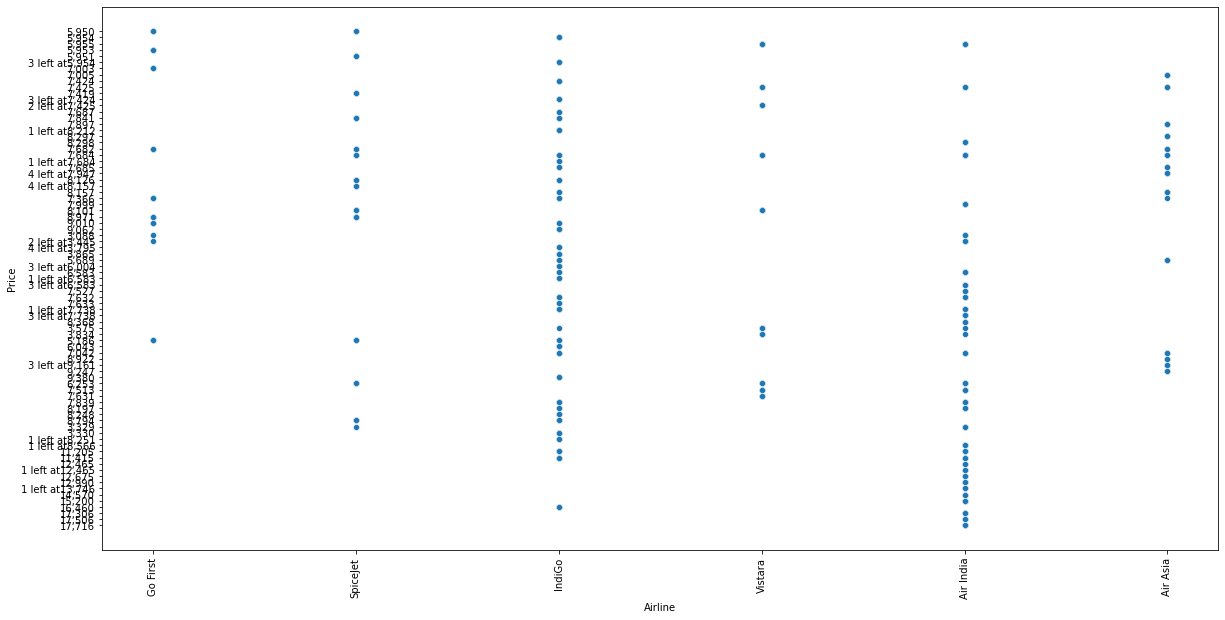

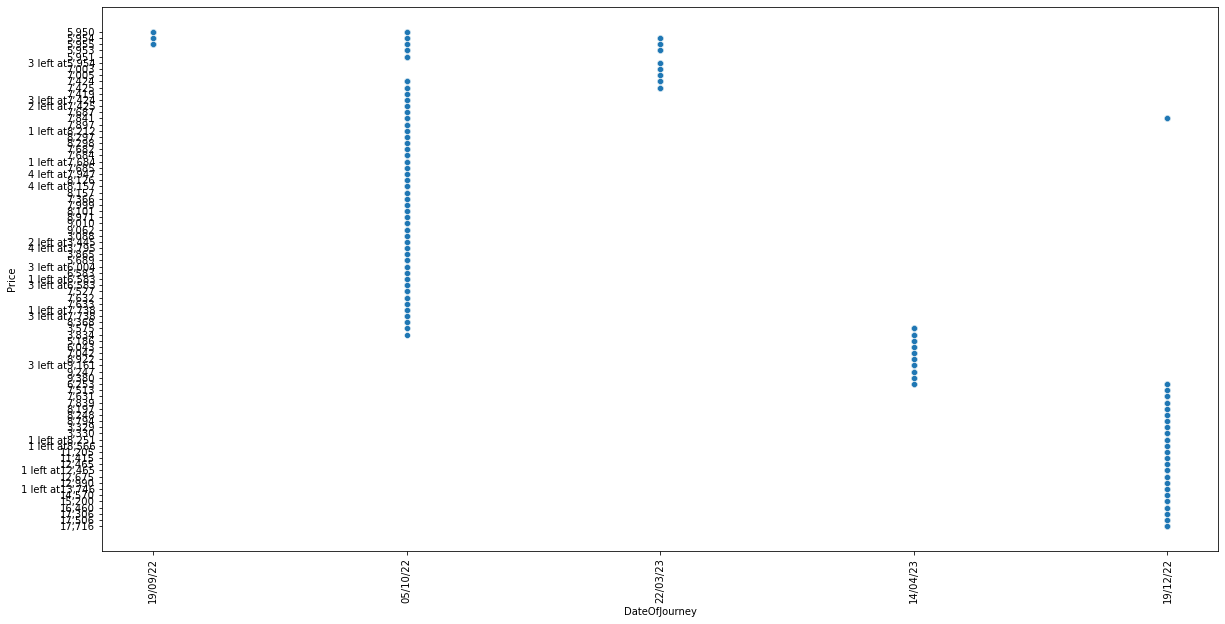

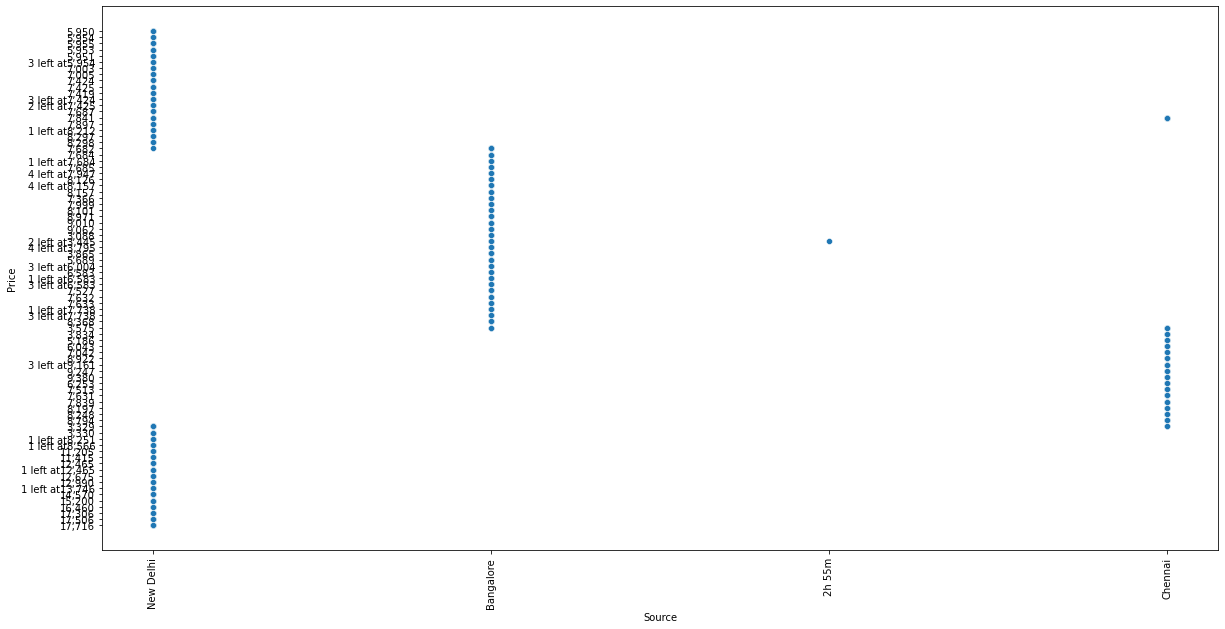

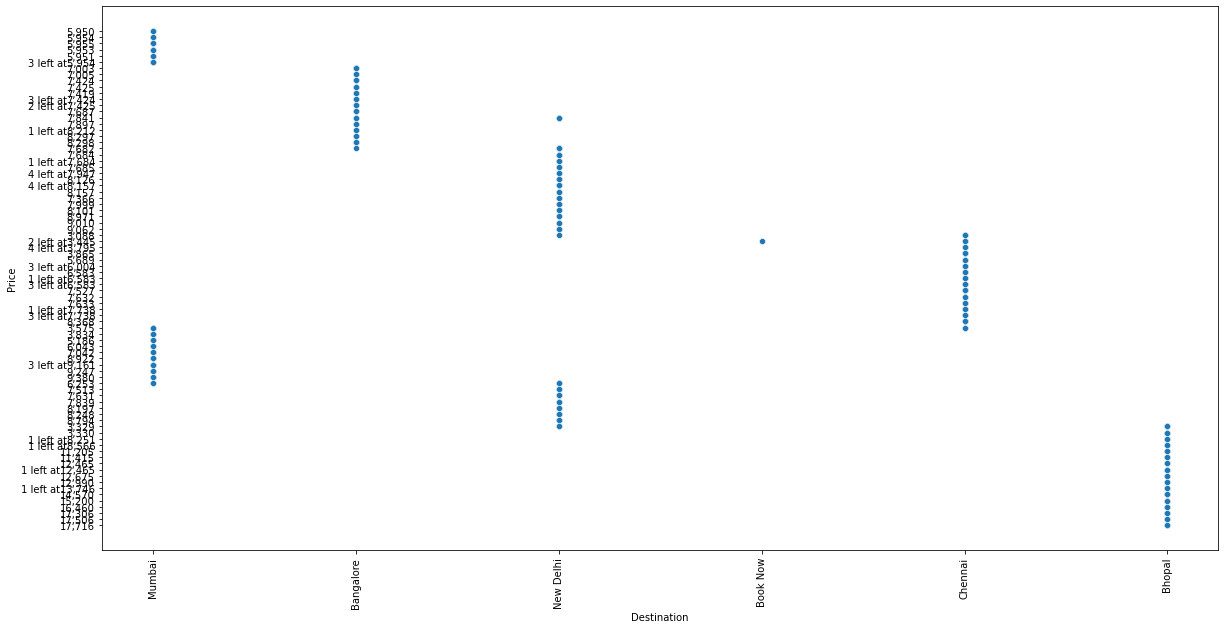

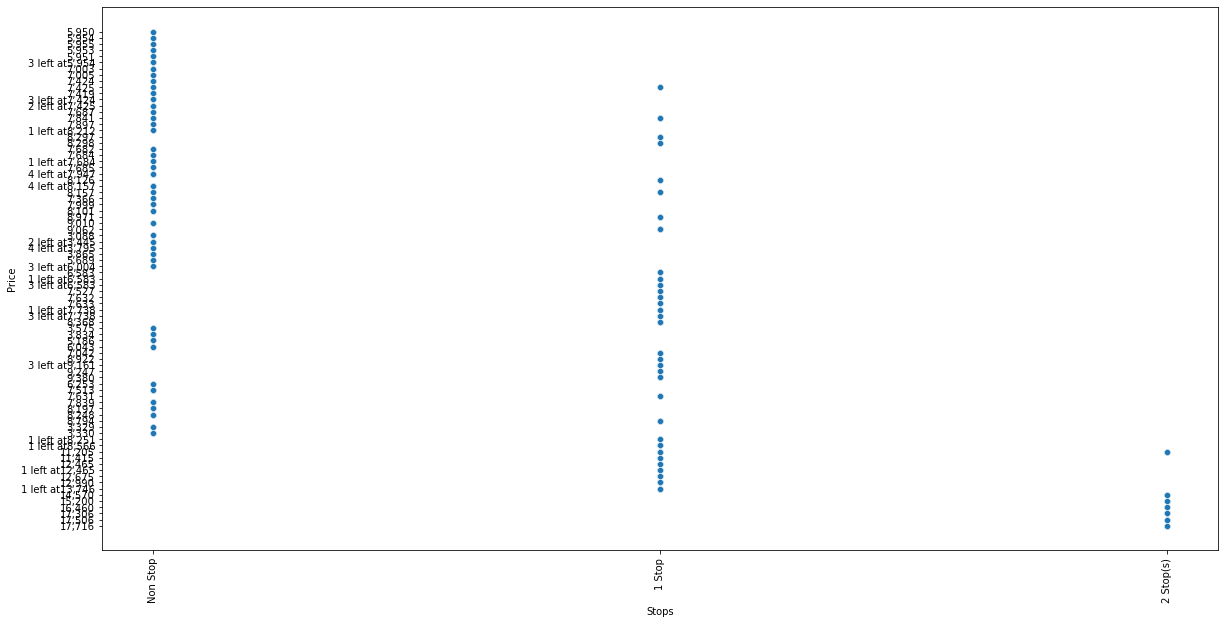

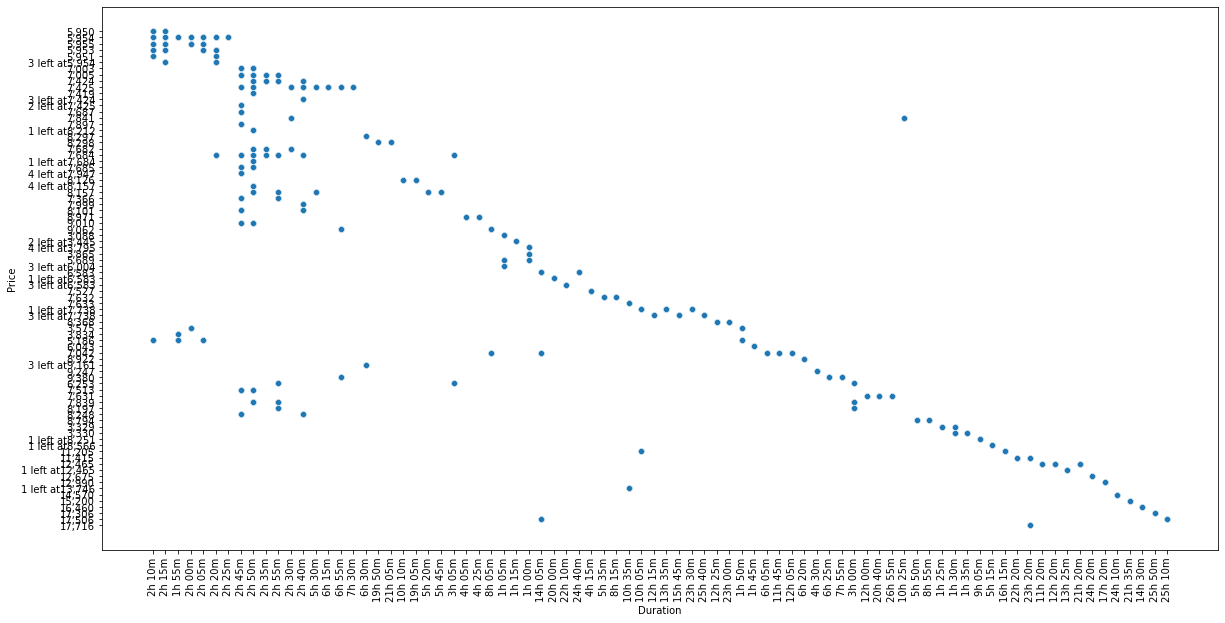

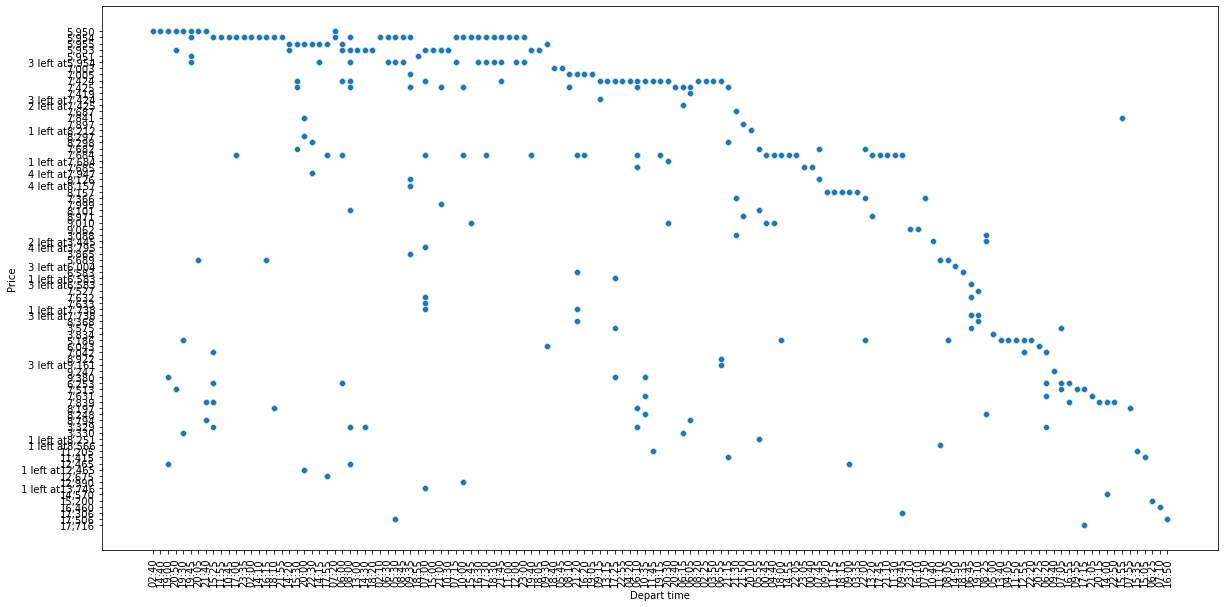

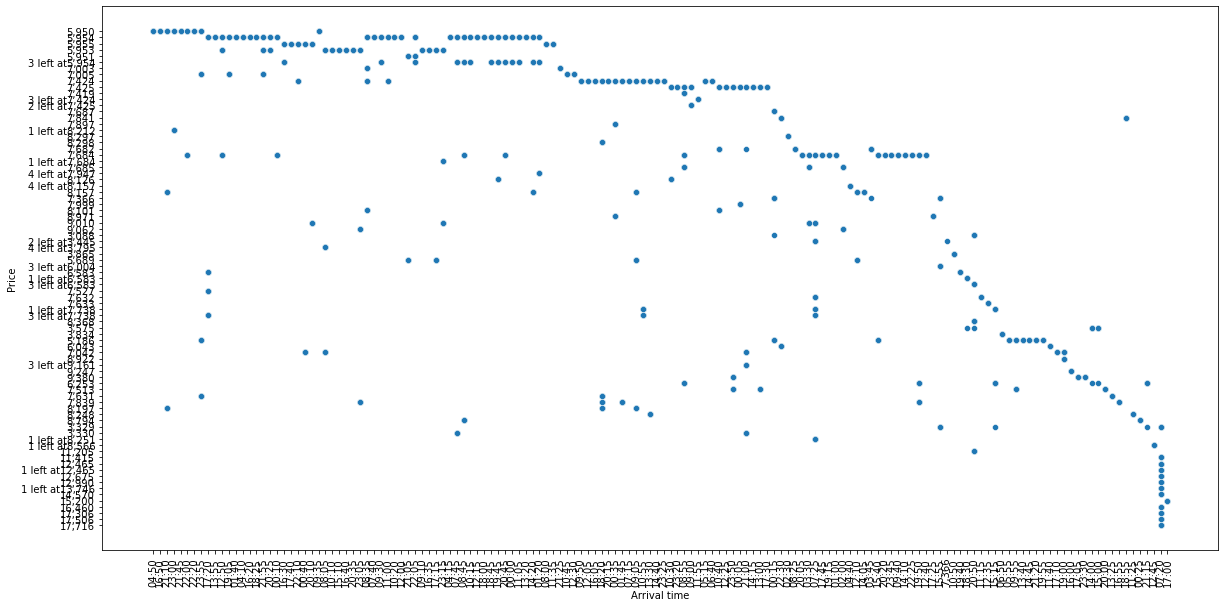

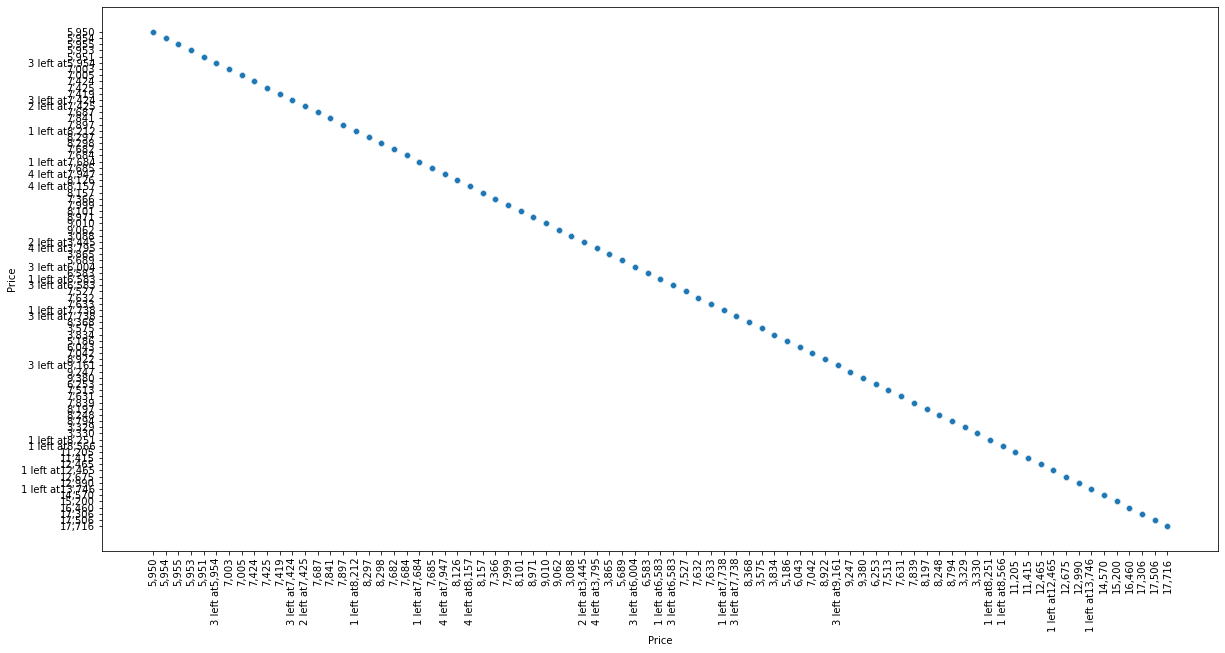

In [6]:
col=df.columns
#Plotting Scatter plot for each feature

for i in col:
    plt.figure(figsize=(20,10))
    a=sns.scatterplot(x=df[i],y=df['Price'],data=df)
    plt.xlabel(i)
    plt.xticks(rotation=90)
    plt.show()

Looking at the above graph we need to clean the data by cleaning Price values, converting duration into minutes and splitting arrival time and departure time into hours and minutes. So for this we will perform feature engineering.

## Feature Engineering

In [4]:
i=df[df['Price'].str.contains('left at')]['Price'].index.tolist()

In [5]:
df.loc[i,'Price'].str.split("at",expand=True)[1]

4509      5,954
4510      5,954
4511      5,954
4512      5,954
4514      5,954
          ...  
15460    13,746
15473     8,251
15474     8,566
15481    12,465
15485    13,746
Name: 1, Length: 1296, dtype: object

In [6]:
df.at[i,'Price']=df.loc[i,'Price'].str.split("at",expand=True)[1]

Now we will convert Price from object to float

In [7]:
df['Price'] = df['Price'].str.replace(',', '')
df['Price']=df['Price'].astype(float)

In [8]:
#Splitting date of journey (DateOfJourney)

df['DateOfJourney']=pd.to_datetime(df['DateOfJourney'])
df['journey_date'] = df['DateOfJourney'].dt.day
df['journey_month'] = df['DateOfJourney'].dt.month
df['journey_year'] = df['DateOfJourney'].dt.year
df.head()

,Airline,DateOfJourney,Source,Destination,Stops,Duration,Depart time,Arrival time,Price,journey_date,journey_month,journey_year
0,Go First,2022-09-19,New Delhi,Mumbai,Non Stop,2h 10m,02:40,04:50,5950.0,19,9,2022
1,Go First,2022-09-19,New Delhi,Mumbai,Non Stop,2h 10m,14:40,16:50,5950.0,19,9,2022
2,SpiceJet,2022-09-19,New Delhi,Mumbai,Non Stop,2h 10m,19:00,21:10,5950.0,19,9,2022
3,Go First,2022-09-19,New Delhi,Mumbai,Non Stop,2h 10m,20:50,23:00,5950.0,19,9,2022
4,Go First,2022-09-19,New Delhi,Mumbai,Non Stop,2h 15m,19:30,21:45,5950.0,19,9,2022


In [9]:
df=df.drop(['DateOfJourney'], axis=1)

In [10]:
#Converting duration into minutes
df['Duration']=df['Duration'].str.split(' ').apply(lambda x: int(x[0].split("h")[0]) * 60 + int(x[1].split("m")[0]))

In [11]:
df.head()

,Airline,Source,Destination,Stops,Duration,Depart time,Arrival time,Price,journey_date,journey_month,journey_year
0,Go First,New Delhi,Mumbai,Non Stop,130,02:40,04:50,5950.0,19,9,2022
1,Go First,New Delhi,Mumbai,Non Stop,130,14:40,16:50,5950.0,19,9,2022
2,SpiceJet,New Delhi,Mumbai,Non Stop,130,19:00,21:10,5950.0,19,9,2022
3,Go First,New Delhi,Mumbai,Non Stop,130,20:50,23:00,5950.0,19,9,2022
4,Go First,New Delhi,Mumbai,Non Stop,135,19:30,21:45,5950.0,19,9,2022


In [12]:
# Splitting Depart time into Dept_hour and Dept_min
df['Dept_hour'] = df['Depart time'].str.split(":",expand=True)[0]
df['Dept_min'] = df['Depart time'].str.split(":",expand=True)[1]

In [13]:
# Splitting Arrival time into Arrive_hour and Arrive_min
df['Arrive_hour'] = df['Arrival time'].str.split(":",expand=True)[0]
df['Arrive_min'] = df['Arrival time'].str.split(":",expand=True)[1]

In [14]:
df.head()

,Airline,Source,Destination,Stops,Duration,Depart time,Arrival time,Price,journey_date,journey_month,journey_year,Dept_hour,Dept_min,Arrive_hour,Arrive_min
0,Go First,New Delhi,Mumbai,Non Stop,130,02:40,04:50,5950.0,19,9,2022,02,40,04,50
1,Go First,New Delhi,Mumbai,Non Stop,130,14:40,16:50,5950.0,19,9,2022,14,40,16,50
2,SpiceJet,New Delhi,Mumbai,Non Stop,130,19:00,21:10,5950.0,19,9,2022,19,00,21,10
3,Go First,New Delhi,Mumbai,Non Stop,130,20:50,23:00,5950.0,19,9,2022,20,50,23,00
4,Go First,New Delhi,Mumbai,Non Stop,135,19:30,21:45,5950.0,19,9,2022,19,30,21,45


In [15]:
df=df.drop(['Depart time','Arrival time'],axis=1)

In [16]:
df.head()

,Airline,Source,Destination,Stops,Duration,Price,journey_date,journey_month,journey_year,Dept_hour,Dept_min,Arrive_hour,Arrive_min
0,Go First,New Delhi,Mumbai,Non Stop,130,5950.0,19,9,2022,02,40,04,50
1,Go First,New Delhi,Mumbai,Non Stop,130,5950.0,19,9,2022,14,40,16,50
2,SpiceJet,New Delhi,Mumbai,Non Stop,130,5950.0,19,9,2022,19,00,21,10
3,Go First,New Delhi,Mumbai,Non Stop,130,5950.0,19,9,2022,20,50,23,00
4,Go First,New Delhi,Mumbai,Non Stop,135,5950.0,19,9,2022,19,30,21,45


In [81]:
df['Stops'].value_counts()

Non Stop     12077
1 Stop        2936
2 Stop(s)      480
Name: Stops, dtype: int64

In [17]:
df['Stops']=df['Stops'].apply(lambda x: '0' if x=='Non Stop' else ('1' if x=='1 Stop' else '2'))

In [18]:
df.head()

,Airline,Source,Destination,Stops,Duration,Price,journey_date,journey_month,journey_year,Dept_hour,Dept_min,Arrive_hour,Arrive_min
0,Go First,New Delhi,Mumbai,0,130,5950.0,19,9,2022,02,40,04,50
1,Go First,New Delhi,Mumbai,0,130,5950.0,19,9,2022,14,40,16,50
2,SpiceJet,New Delhi,Mumbai,0,130,5950.0,19,9,2022,19,00,21,10
3,Go First,New Delhi,Mumbai,0,130,5950.0,19,9,2022,20,50,23,00
4,Go First,New Delhi,Mumbai,0,135,5950.0,19,9,2022,19,30,21,45


In [19]:
df.dtypes

Airline           object
Source            object
Destination       object
Stops             object
Duration           int64
Price            float64
journey_date       int64
journey_month      int64
journey_year       int64
Dept_hour         object
Dept_min          object
Arrive_hour       object
Arrive_min        object
dtype: object

In [87]:
# Converting data type of departure hour and minute and arrival hour and minute
df['Dept_hour']=df['Dept_hour'].astype(float)
df['Dept_min']=df['Dept_min'].astype(float)
df['Arrive_hour']=df['Arrive_hour'].astype(float)
df['Arrive_min']=df['Arrive_min'].astype(float)


ValueError: could not convert string to float: '7,366'

## This error means that there is 1 wrong value oin column Arrive_hour so lets find that value and drop the row.

In [20]:
df.loc[df['Destination']=='Book Now']

,Airline,Source,Destination,Stops,Duration,Price,journey_date,journey_month,journey_year,Dept_hour,Dept_min,Arrive_hour,Arrive_min
10184,Go First,2h 55m,Book Now,0,75,3445.0,10,5,2022,10,40,"7,366",None


In [21]:
df=df.drop(df.index[10184])
df.head()

,Airline,Source,Destination,Stops,Duration,Price,journey_date,journey_month,journey_year,Dept_hour,Dept_min,Arrive_hour,Arrive_min
0,Go First,New Delhi,Mumbai,0,130,5950.0,19,9,2022,02,40,04,50
1,Go First,New Delhi,Mumbai,0,130,5950.0,19,9,2022,14,40,16,50
2,SpiceJet,New Delhi,Mumbai,0,130,5950.0,19,9,2022,19,00,21,10
3,Go First,New Delhi,Mumbai,0,130,5950.0,19,9,2022,20,50,23,00
4,Go First,New Delhi,Mumbai,0,135,5950.0,19,9,2022,19,30,21,45


In [22]:
# Converting data type of departure hour and minute and arrival hour and minute
df['Dept_hour']=df['Dept_hour'].astype(float)
df['Dept_min']=df['Dept_min'].astype(float)
df['Arrive_hour']=df['Arrive_hour'].astype(float)
df['Arrive_min']=df['Arrive_min'].astype(float)

## Checking relationship in this clean data

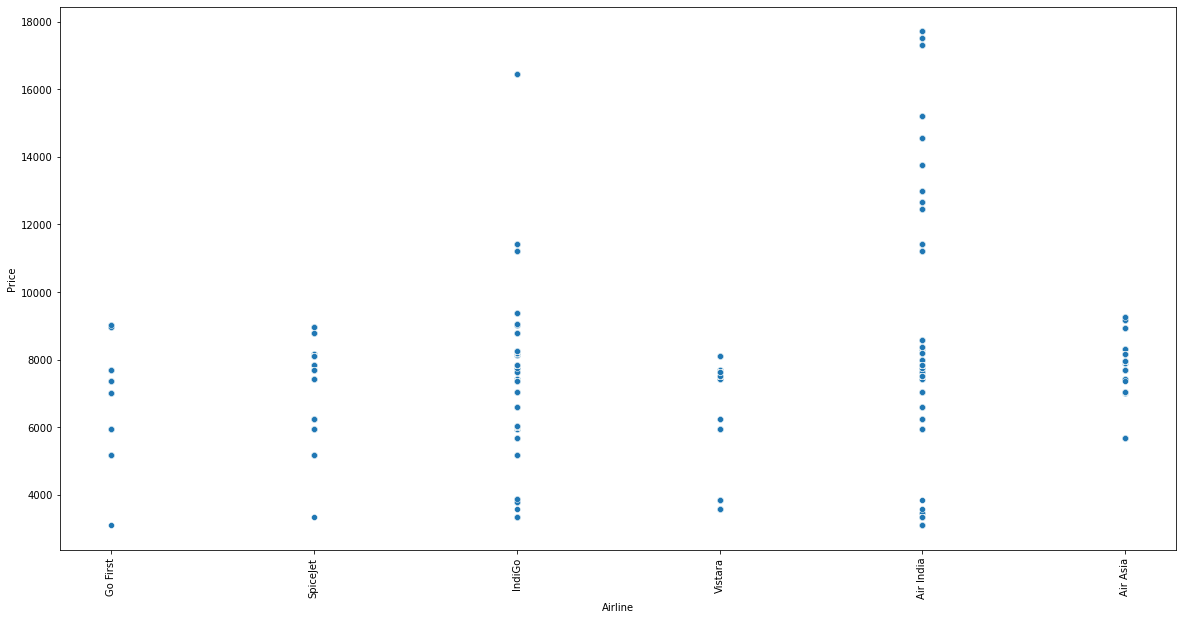

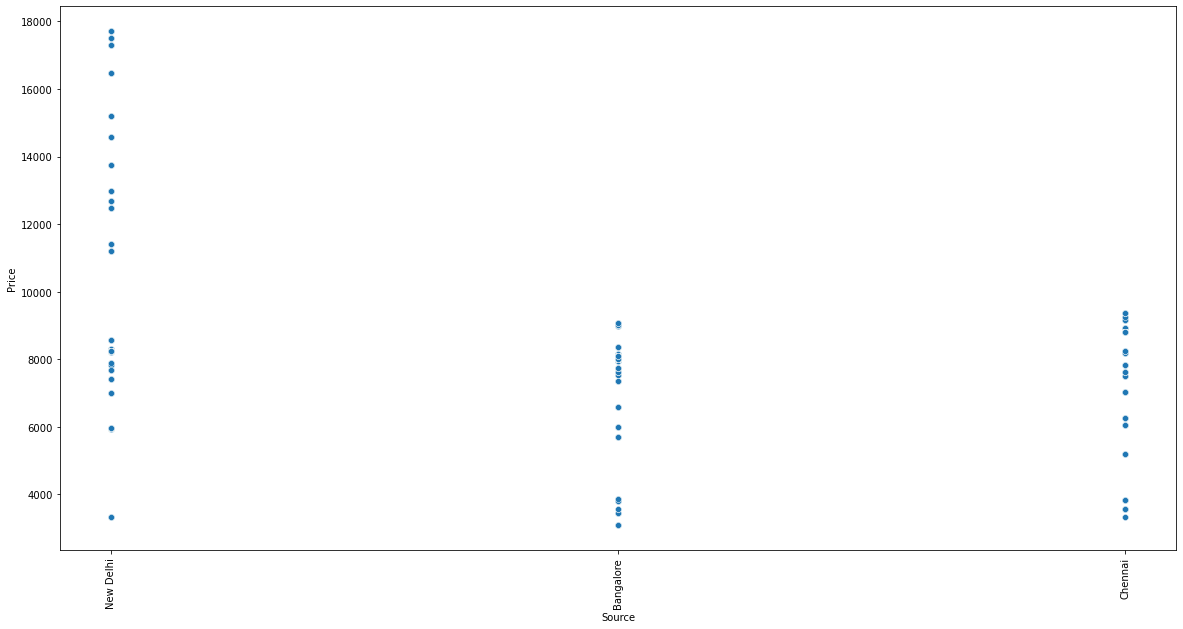

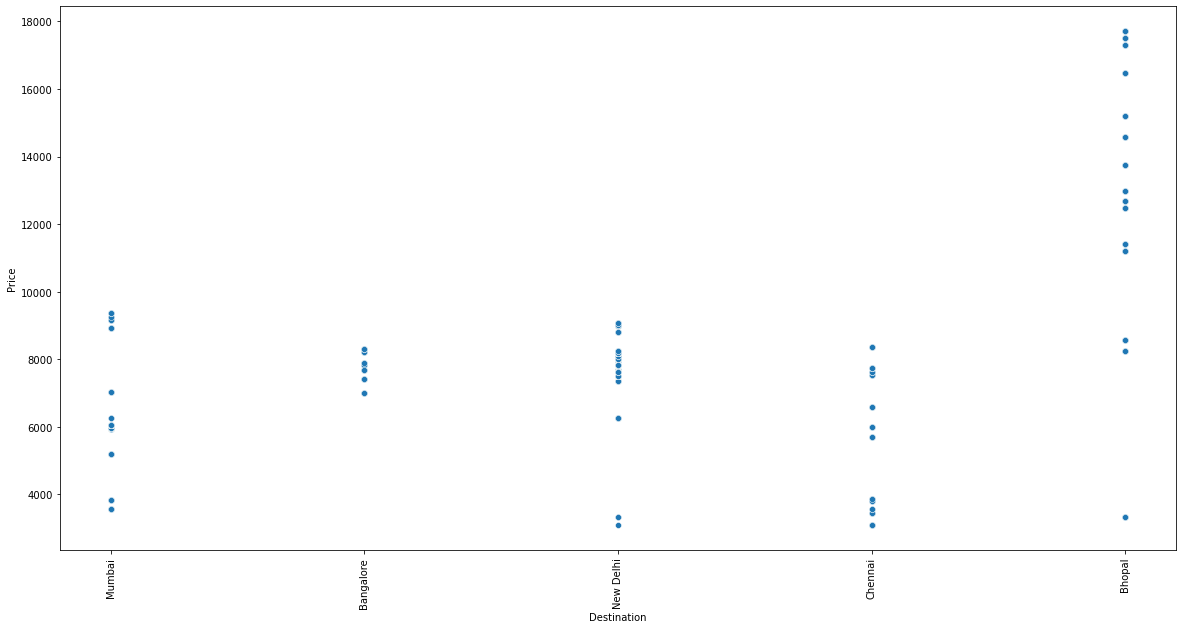

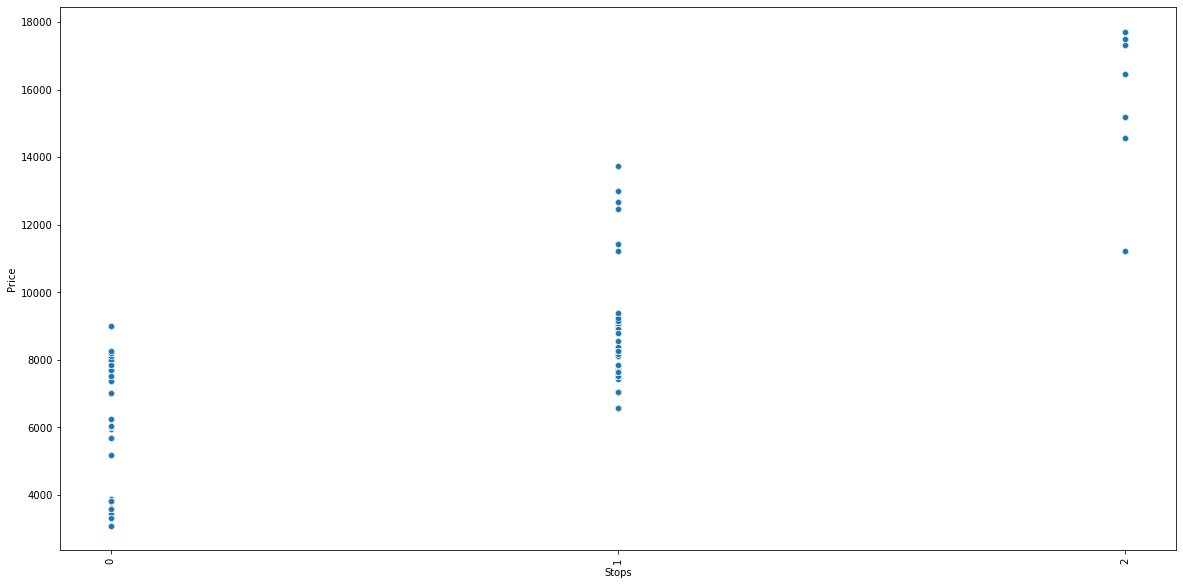

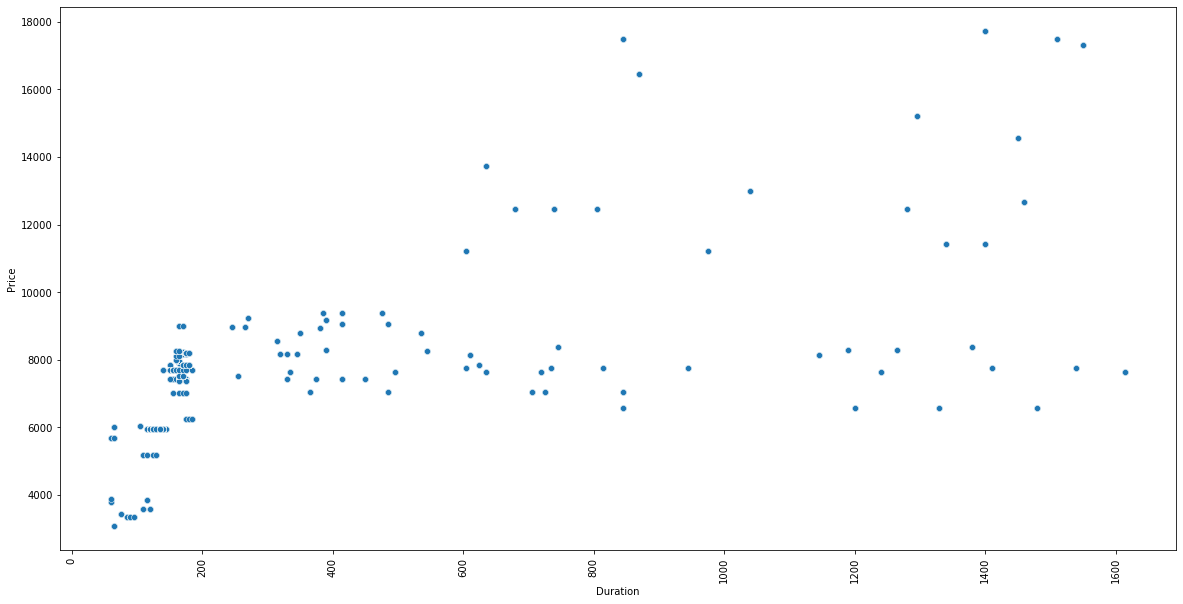

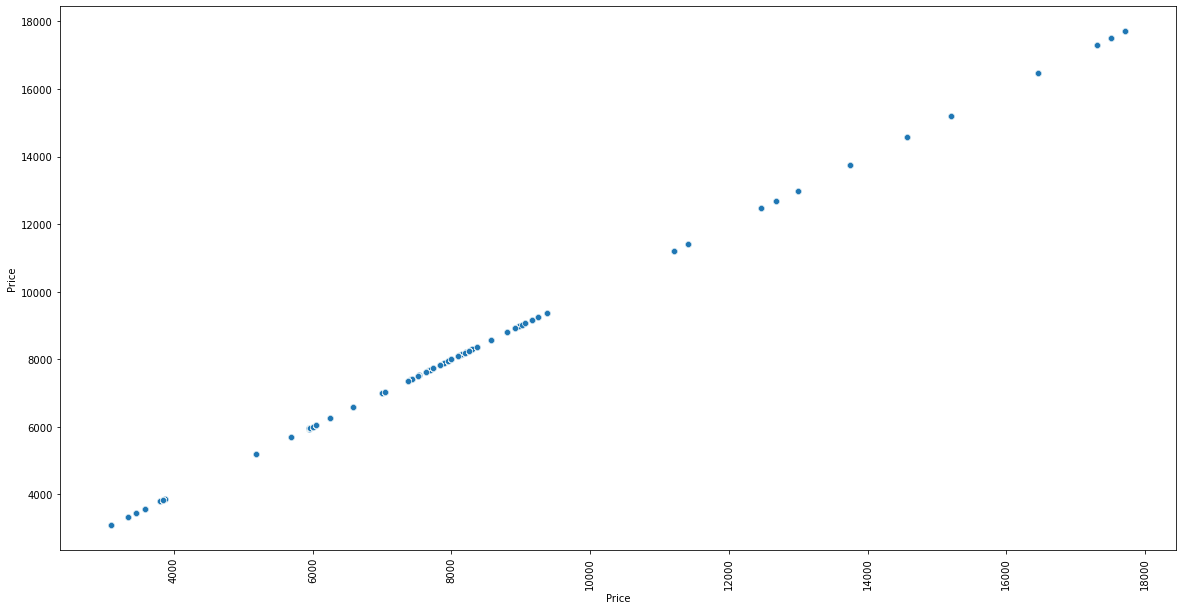

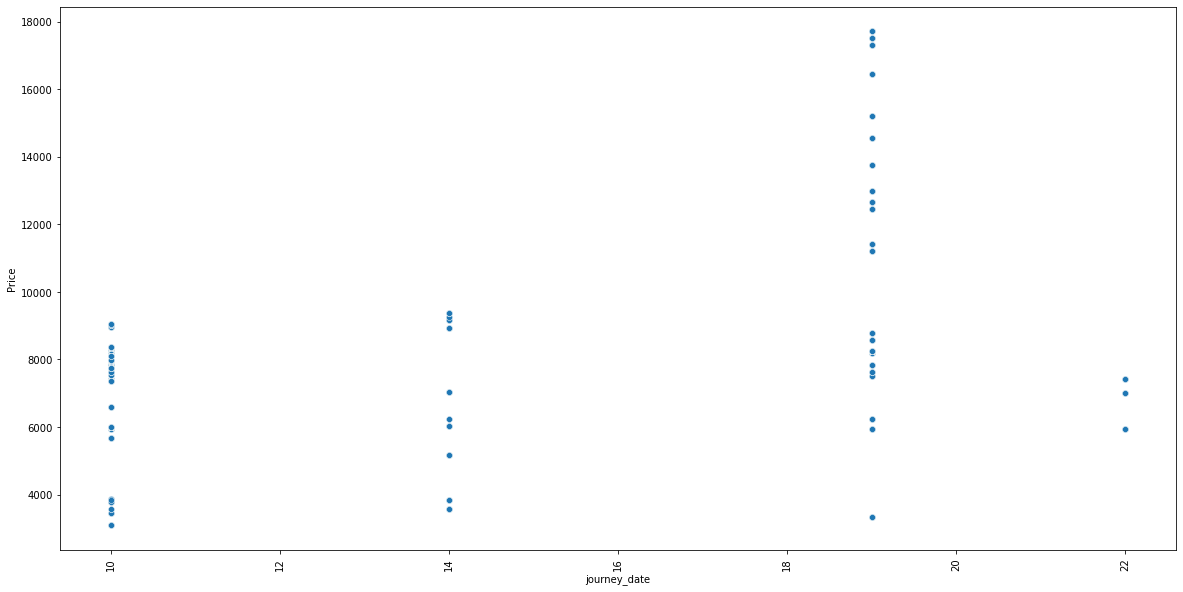

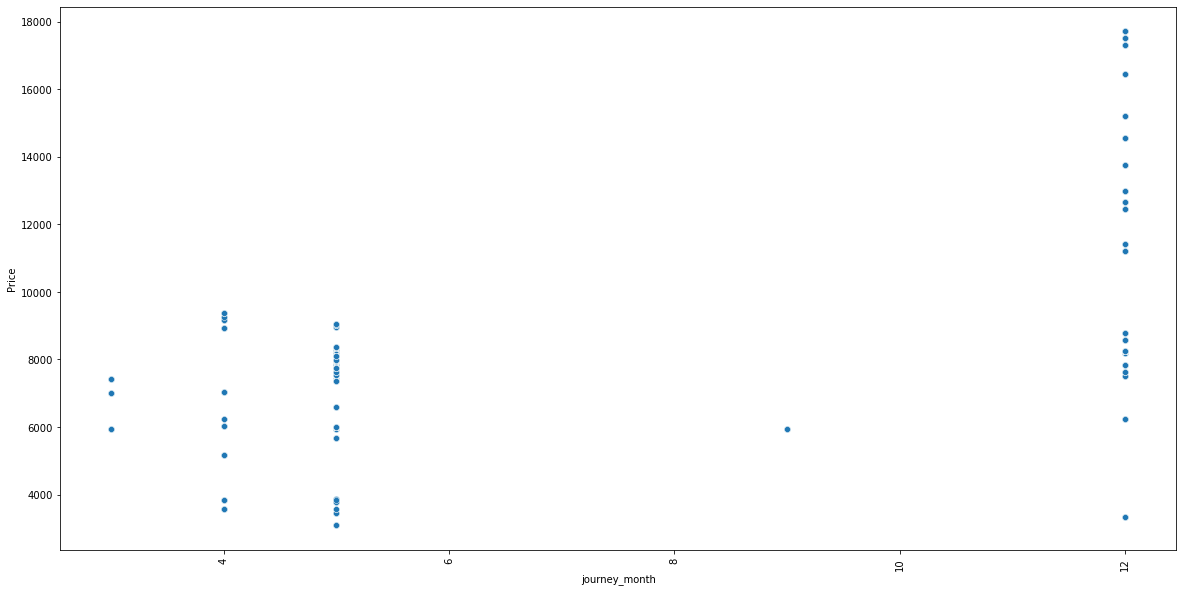

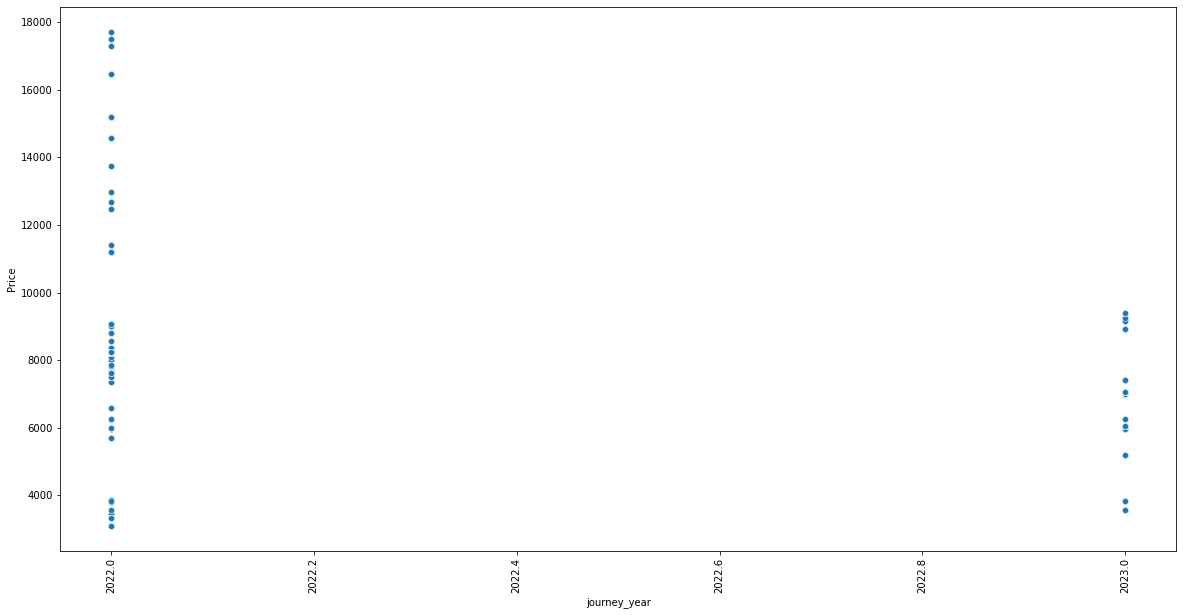

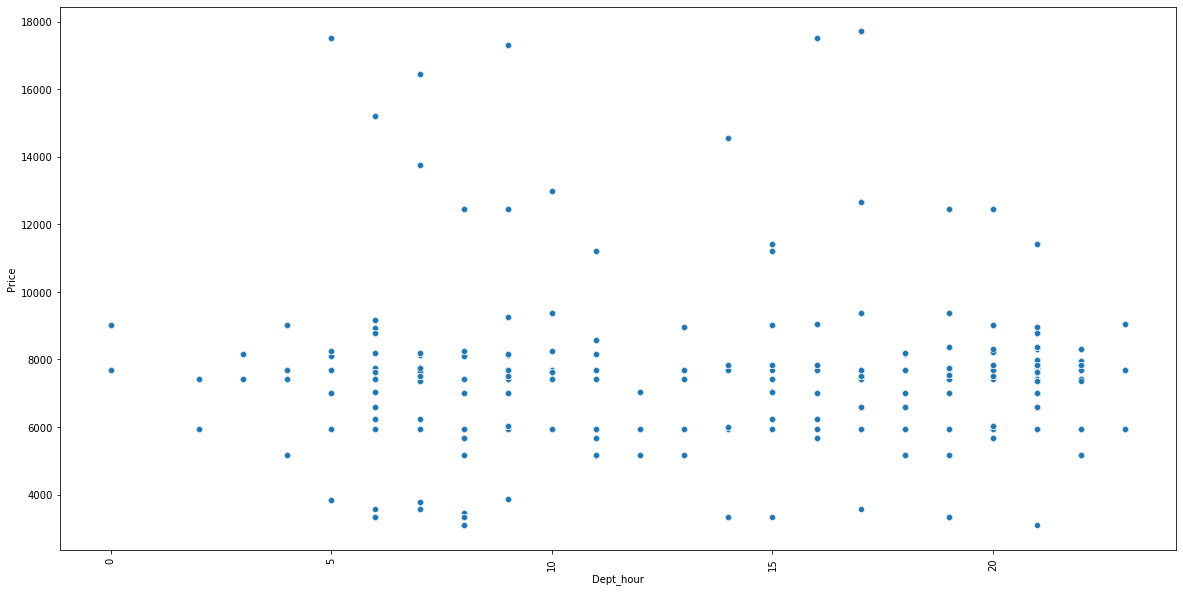

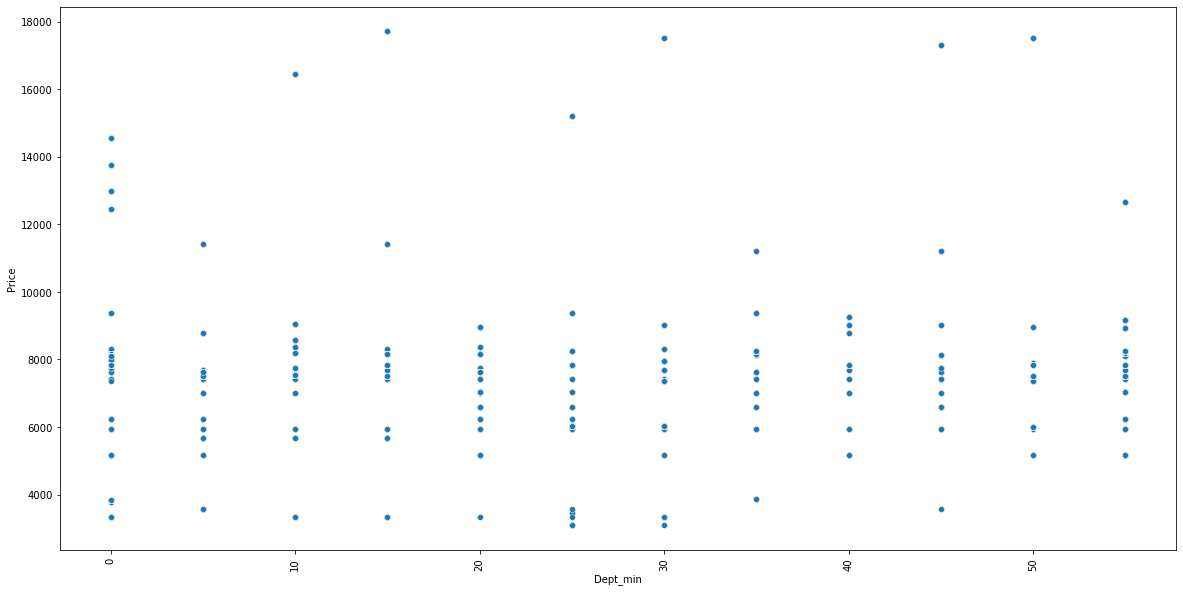

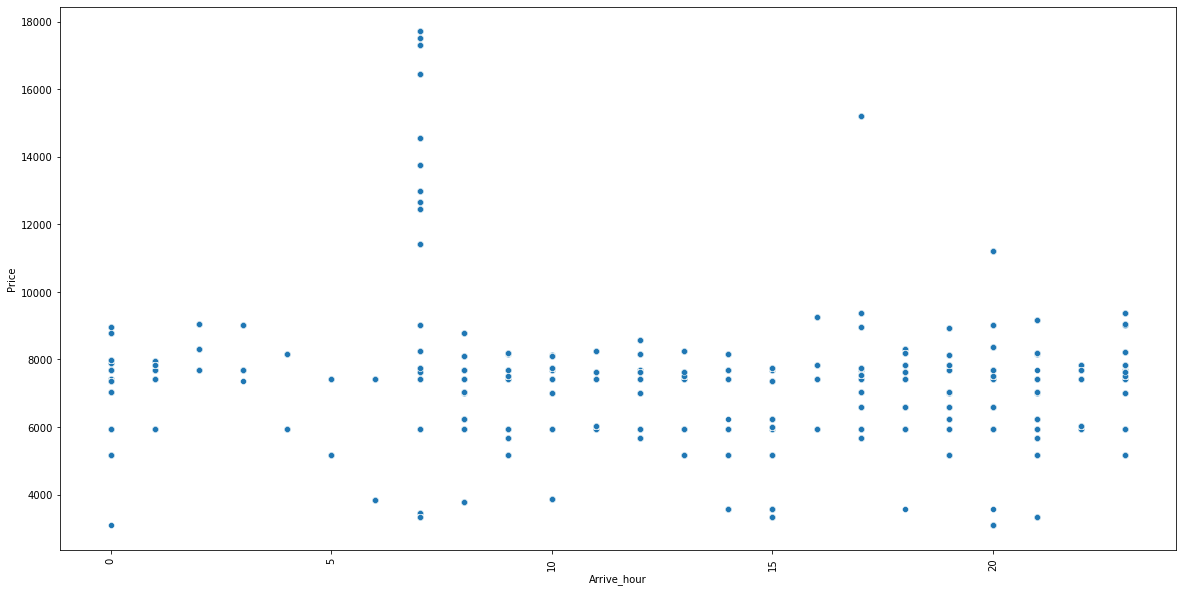

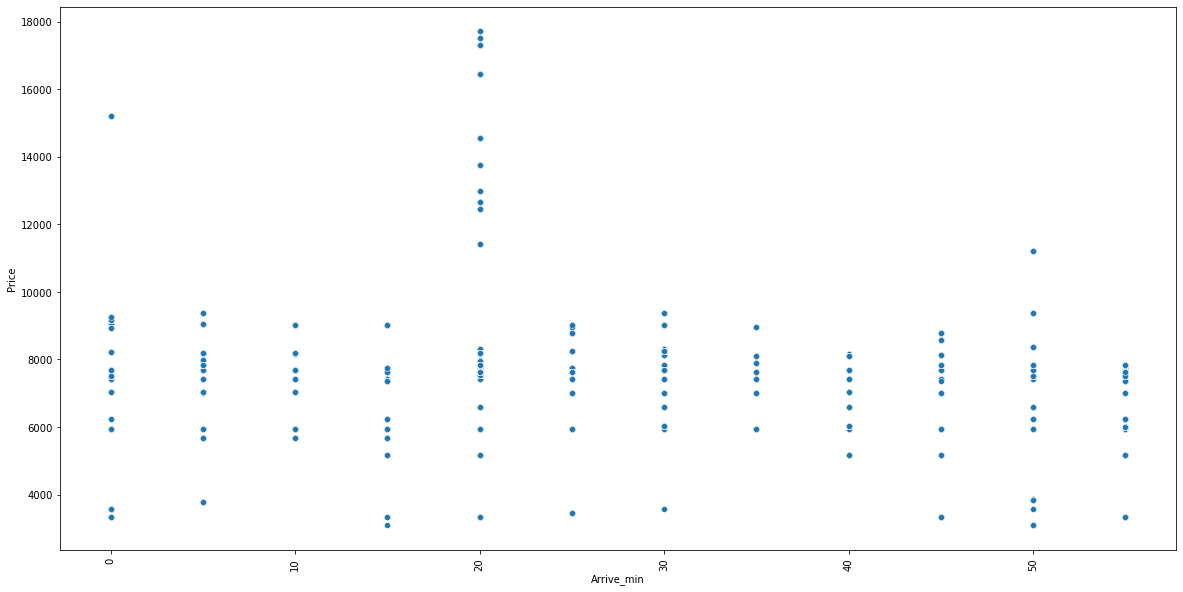

In [91]:
col=df.columns
#Plotting Scatter plot for each feature

for i in col:
    plt.figure(figsize=(20,10))
    a=sns.scatterplot(x=df[i],y=df['Price'],data=df)
    plt.xlabel(i)
    plt.xticks(rotation=90)
    plt.show()

## Encoding

Since Airline, Source and Destination has text values so we need to encode them.

In [26]:
category=['Airline','Source','Destination','Stops']
oe=OrdinalEncoder()
for i in category:
    df1=oe.fit_transform(df[[i]])
    df[i]=df1
df

,Airline,Source,Destination,Stops,Duration,Price,journey_date,journey_month,journey_year,Dept_hour,Dept_min,Arrive_hour,Arrive_min
0,2.0,2.0,3.0,0.0,130,5950.0,19,9,2022,2.0,40.0,4.0,50.0
1,2.0,2.0,3.0,0.0,130,5950.0,19,9,2022,14.0,40.0,16.0,50.0
2,4.0,2.0,3.0,0.0,130,5950.0,19,9,2022,19.0,0.0,21.0,10.0
3,2.0,2.0,3.0,0.0,130,5950.0,19,9,2022,20.0,50.0,23.0,0.0
4,2.0,2.0,3.0,0.0,135,5950.0,19,9,2022,19.0,30.0,21.0,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15488,3.0,2.0,1.0,2.0,870,16460.0,19,12,2022,7.0,10.0,7.0,20.0
15489,1.0,2.0,1.0,2.0,1550,17306.0,19,12,2022,9.0,45.0,7.0,20.0
15490,1.0,2.0,1.0,2.0,845,17506.0,19,12,2022,16.0,50.0,7.0,20.0
15491,1.0,2.0,1.0,2.0,1510,17506.0,19,12,2022,5.0,30.0,7.0,20.0


## Describing the data

In [27]:
df.describe()

,Airline,Source,Destination,Stops,Duration,Price,journey_date,journey_month,journey_year,Dept_hour,Dept_min,Arrive_hour,Arrive_min
count,15492.000000,15492.000000,15492.000000,15492.000000,15492.000000,15492.000000,15492.000000,15492.000000,15492.000000,15492.000000,15492.000000,15492.000000,15492.000000
mean,2.440227,1.340176,2.617545,0.251485,286.624710,7281.230054,14.737219,6.355086,2022.241609,12.989414,24.036922,13.014395,26.243545
std,1.326053,0.831070,1.346759,0.500224,332.799771,2267.342499,4.844688,3.141466,0.428072,6.053354,18.721879,6.839934,17.948884
min,0.000000,0.000000,0.000000,0.000000,60.000000,3088.000000,10.000000,3.000000,2022.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,2.000000,0.000000,135.000000,5954.000000,10.000000,5.000000,2022.000000,7.000000,5.000000,8.000000,10.000000
50%,3.000000,2.000000,3.000000,0.000000,165.000000,7042.000000,14.000000,5.000000,2022.000000,14.000000,25.000000,13.000000,25.000000
75%,3.000000,2.000000,4.000000,0.000000,175.000000,7738.000000,19.000000,9.000000,2022.000000,19.000000,40.000000,19.000000,45.000000
max,5.000000,2.000000,4.000000,2.000000,1615.000000,17716.000000,22.000000,12.000000,2023.000000,23.000000,55.000000,23.000000,55.000000


## Finding correlation between features

In [28]:
df.corr().abs()

,Airline,Source,Destination,Stops,Duration,Price,journey_date,journey_month,journey_year,Dept_hour,Dept_min,Arrive_hour,Arrive_min
Airline,1.000000,0.019330,0.203266,0.276202,0.213346,0.262617,0.058369,0.101697,0.006053,0.025266,0.044147,0.047428,0.028055
Source,0.019330,1.000000,0.541659,0.076293,0.050607,0.064540,0.463883,0.120135,0.175960,0.022479,0.053042,0.013890,0.048549
Destination,0.203266,0.541659,1.000000,0.195473,0.220831,0.208708,0.389827,0.099923,0.343474,0.038660,0.106567,0.075125,0.005880
Stops,0.276202,0.076293,0.195473,1.000000,0.843185,0.751514,0.067760,0.342626,0.084805,0.041673,0.014111,0.053622,0.086924
Duration,0.213346,0.050607,0.220831,0.843185,1.000000,0.691060,0.104575,0.373702,0.134876,0.026178,0.008194,0.058636,0.018501
Price,0.262617,0.064540,0.208708,0.751514,0.691060,1.000000,0.152051,0.381954,0.148769,0.024815,0.013599,0.145538,0.089052
journey_date,0.058369,0.463883,0.389827,0.067760,0.104575,0.152051,1.000000,0.354297,0.472651,0.039630,0.004643,0.063524,0.058140
journey_month,0.101697,0.120135,0.099923,0.342626,0.373702,0.381954,0.354297,1.000000,0.530825,0.039623,0.022076,0.018293,0.031666
journey_year,0.006053,0.175960,0.343474,0.084805,0.134876,0.148769,0.472651,0.530825,1.000000,0.048040,0.004710,0.079152,0.012984
Dept_hour,0.025266,0.022479,0.038660,0.041673,0.026178,0.024815,0.039630,0.039623,0.048040,1.000000,0.070339,0.305482,0.035007


<AxesSubplot:>

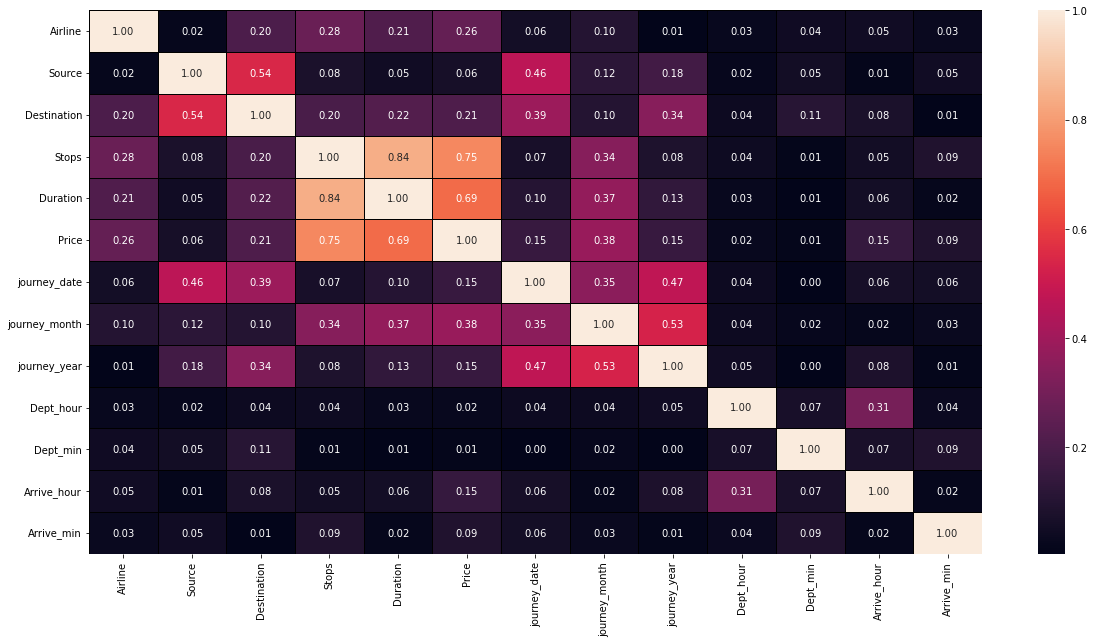

In [29]:
# Plotting heat map for better analysis
plt.figure(figsize=(20,10))
sns.heatmap(df.corr().abs(),annot=True,linewidth=0.5,linecolor='black',fmt='.2f')

Multicollinearity could exists betweeb Duration and Stops so we will further check using VIF score.

## VIF

In [30]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(df.values,i) for i in range(len(df.columns))]
vif['features']=df.columns
vif

,vif,features
0,5.033955,Airline
1,6.725618,Source
2,10.273601,Destination
3,5.677254,Stops
4,6.690740,Duration
5,29.905797,Price
6,16.662717,journey_date
7,8.739873,journey_month
8,62.525348,journey_year
9,6.372891,Dept_hour


We will drop journey_year as its vif score is greater than 10 and check vif again.

In [31]:
df=df.drop(['journey_year'],axis=1)
#Checking vif again
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(df.values,i) for i in range(len(df.columns))]
vif['features']=df.columns
vif

,vif,features
0,4.834602,Airline
1,5.695959,Source
2,7.186901,Destination
3,5.501867,Stops
4,6.685991,Duration
5,18.078831,Price
6,15.027386,journey_date
7,8.270057,journey_month
8,6.190776,Dept_hour
9,2.739638,Dept_min


## Checking outliers

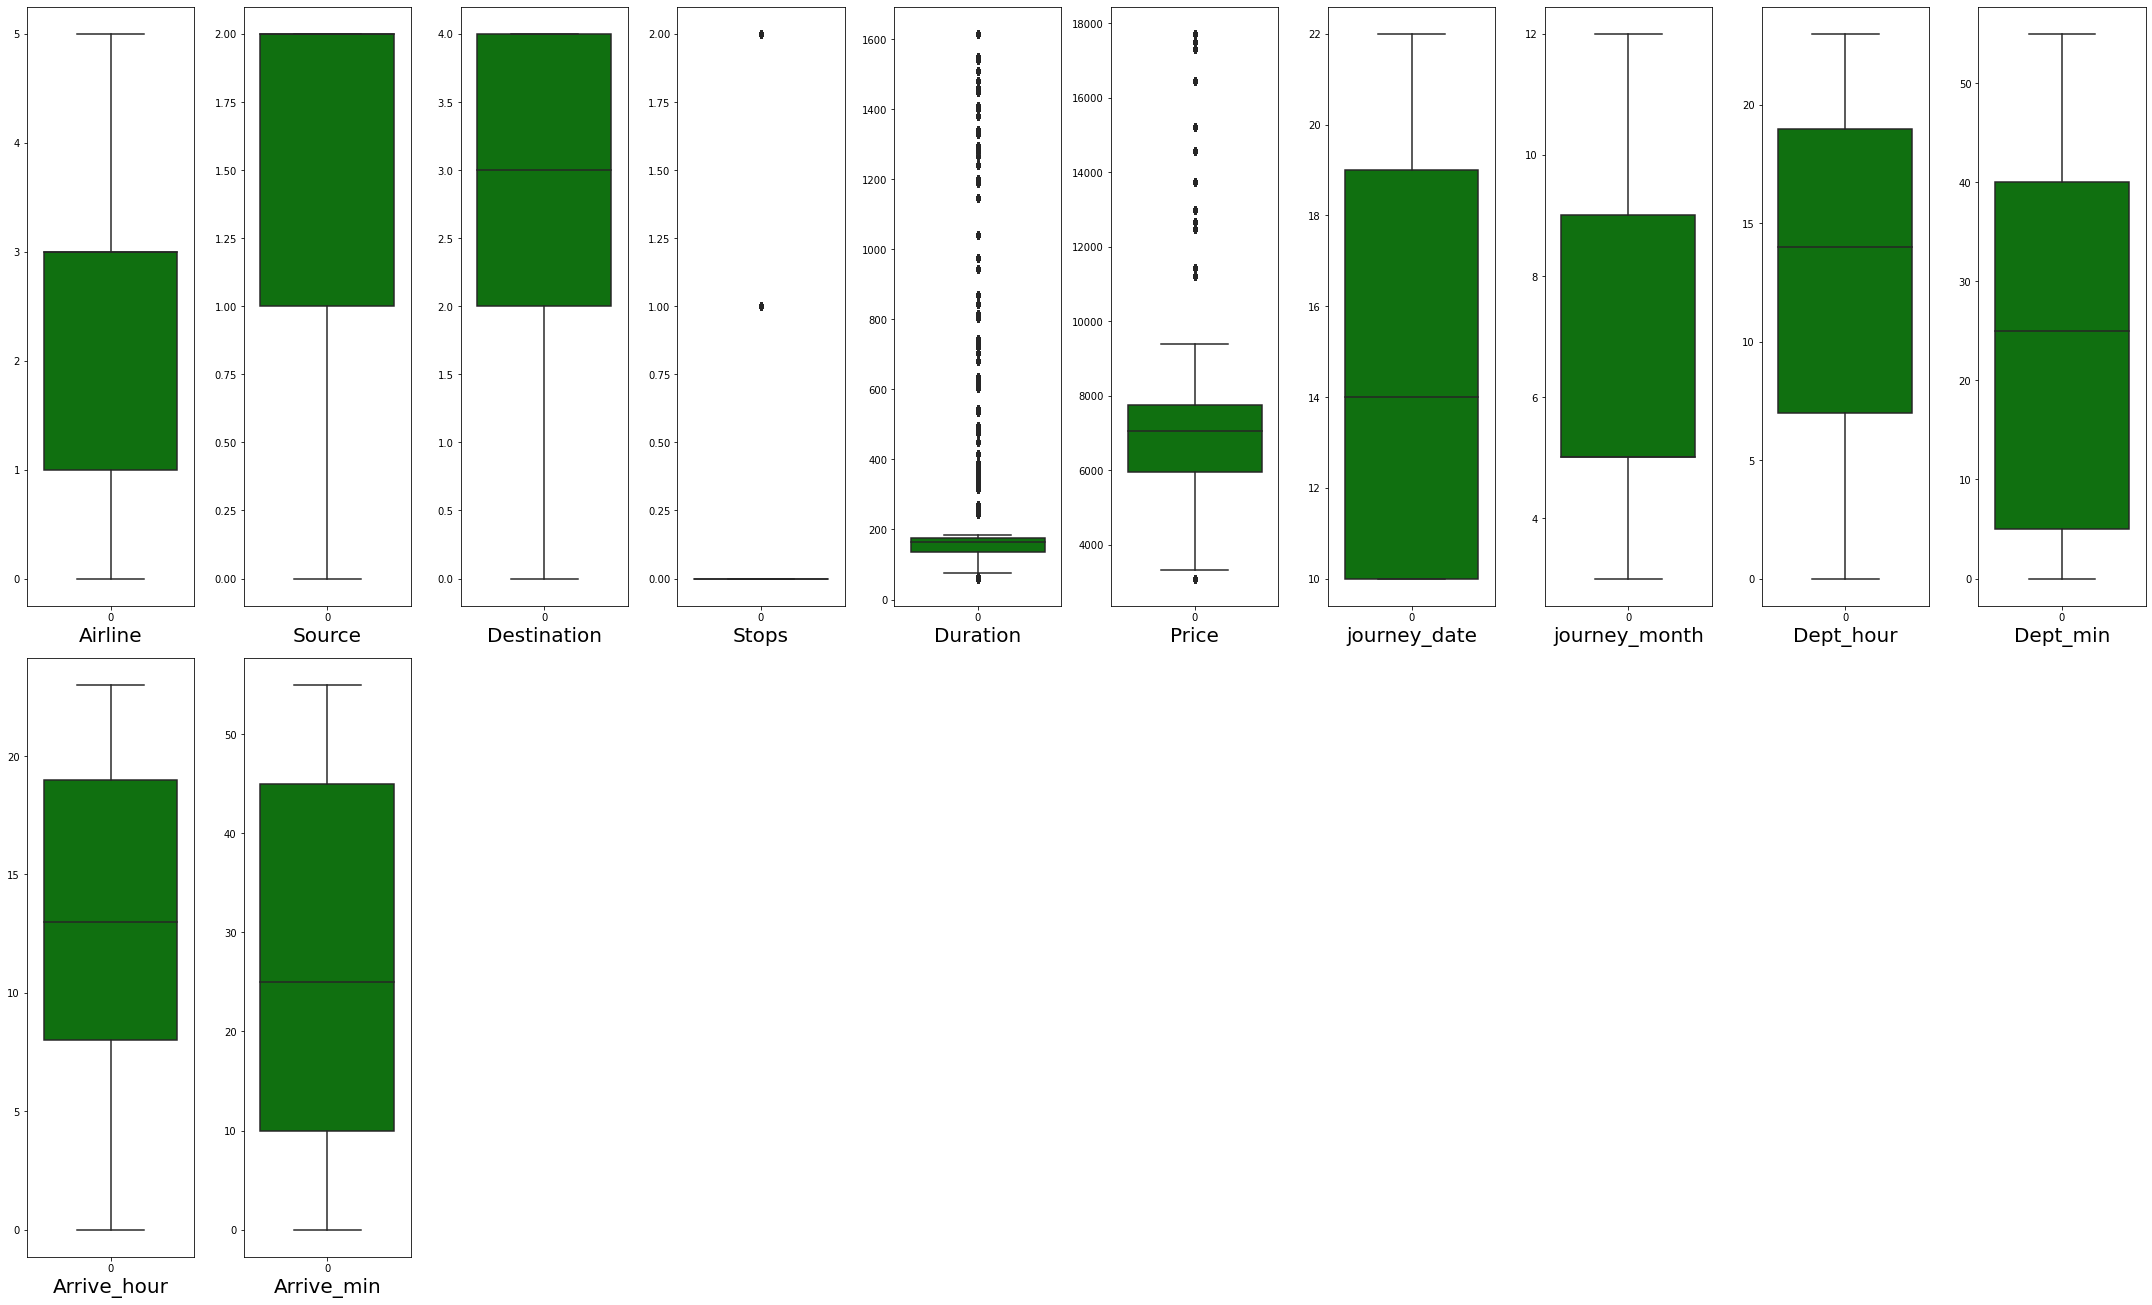

In [32]:
col=df.columns
plt.figure(figsize=(30,90))
for i in range(len(col)):
    plt.subplot(10,10,i+1)
    sns.boxplot(data=df[col[i]],color='green',orient='v')
    plt.xlabel(col[i],fontsize=20)
    plt.tight_layout()

We could observe lot many outliers in Duration.

## Checking skewness

In [33]:
df.skew()

Airline         -0.143276
Source          -0.703965
Destination     -0.876672
Stops            1.859559
Duration         2.502408
Price            2.195881
journey_date     0.247592
journey_month    0.925641
Dept_hour       -0.050461
Dept_min         0.172224
Arrive_hour     -0.228205
Arrive_min       0.159465
dtype: float64

Duration is skewed as its skewness is not in the range(-0.5,0.5)

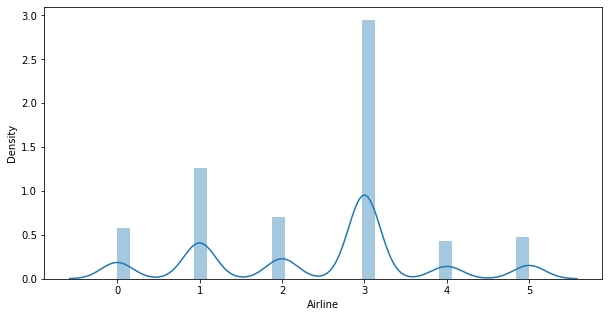

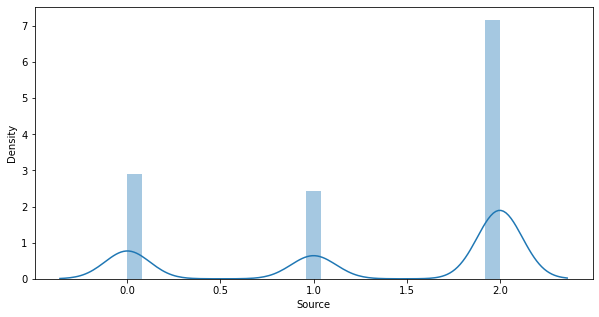

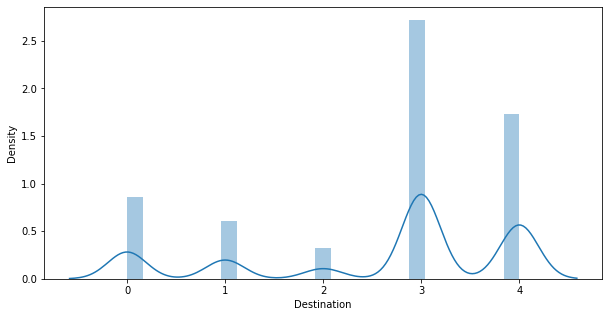

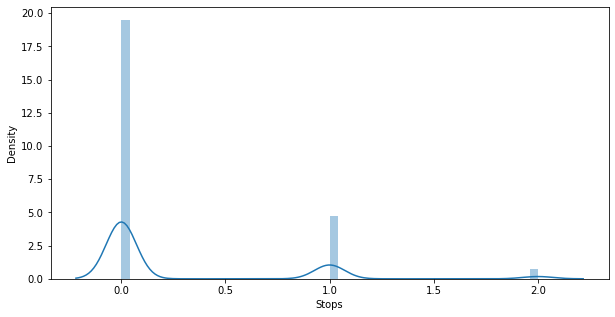

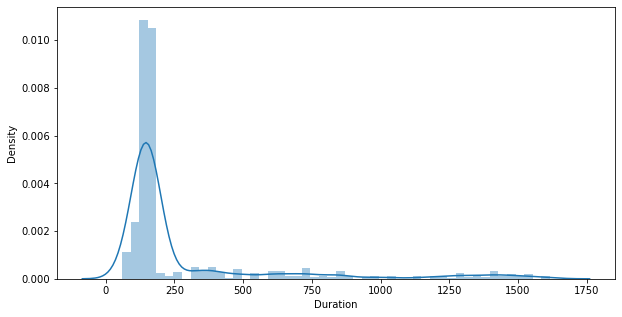

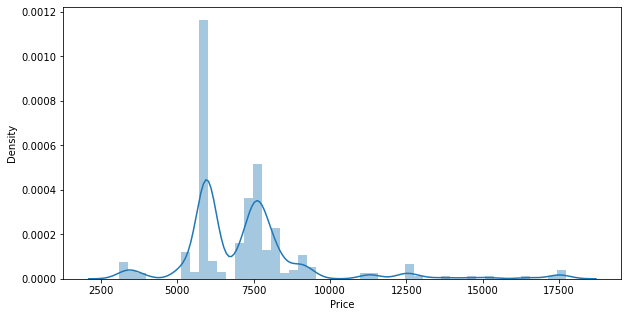

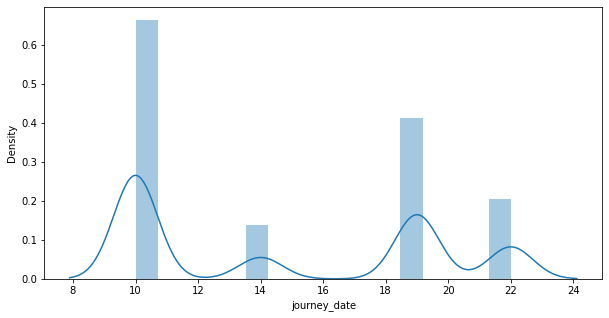

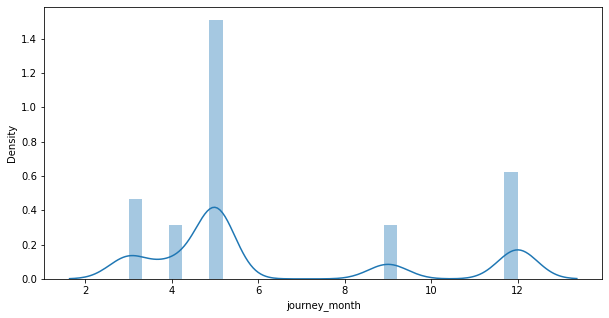

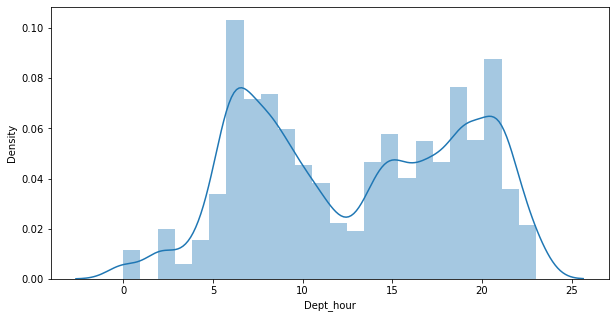

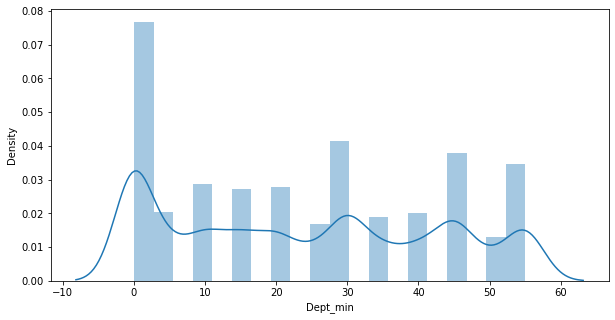

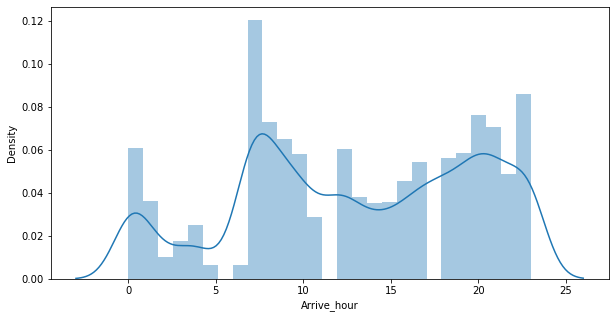

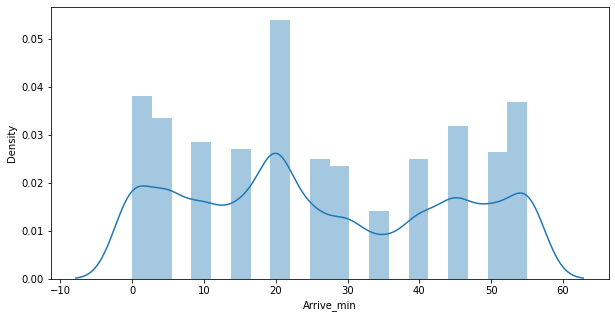

In [34]:
# Ploting Distribution plot to cross check skewness
import warnings
warnings.filterwarnings('ignore')

for i in range(len(col)):
    plt.figure(figsize=(10,5))
    sns.distplot(df[col[i]])
    plt.xlabel(col[i],fontsize=10)

.We could observe that Duration is right skewed

## Treating outliers

Since we collected the data directly from the authorised website so there are no chances of wrong data, all these outliers are exceptional true data so we would not treat it.

## Treating skewness

In [36]:
#using yeo-johnson transformation
df['Duration']=power_transform(df[['Duration']].to_numpy().reshape(-1,1),method='yeo-johnson')
df

,Airline,Source,Destination,Stops,Duration,Price,journey_date,journey_month,Dept_hour,Dept_min,Arrive_hour,Arrive_min
0,2.0,2.0,3.0,0.0,-0.606121,5950.0,19,9,2.0,40.0,4.0,50.0
1,2.0,2.0,3.0,0.0,-0.606121,5950.0,19,9,14.0,40.0,16.0,50.0
2,4.0,2.0,3.0,0.0,-0.606121,5950.0,19,9,19.0,0.0,21.0,10.0
3,2.0,2.0,3.0,0.0,-0.606121,5950.0,19,9,20.0,50.0,23.0,0.0
4,2.0,2.0,3.0,0.0,-0.508232,5950.0,19,9,19.0,30.0,21.0,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...
15488,3.0,2.0,1.0,2.0,1.769451,16460.0,19,12,7.0,10.0,7.0,20.0
15489,1.0,2.0,1.0,2.0,1.975405,17306.0,19,12,9.0,45.0,7.0,20.0
15490,1.0,2.0,1.0,2.0,1.755853,17506.0,19,12,16.0,50.0,7.0,20.0
15491,1.0,2.0,1.0,2.0,1.968262,17506.0,19,12,5.0,30.0,7.0,20.0


## Standardization

In [37]:
x=df.drop(['Price'],axis=1)
y=df['Price']

In [38]:
scaler=StandardScaler()
x=scaler.fit_transform(x)
x

array([[-0.33199372,  0.79397159,  0.28399128, ...,  0.85267046,
        -1.31794915,  1.32360442],
       [-0.33199372,  0.79397159,  0.28399128, ...,  0.85267046,
         0.43651031,  1.32360442],
       [ 1.17628976,  0.79397159,  0.28399128, ..., -1.28393622,
         1.16753509, -0.90501837],
       ...,
       [-1.08613546,  0.79397159, -1.20110339, ...,  1.38682214,
        -0.87933428, -0.34786267],
       [-1.08613546,  0.79397159, -1.20110339, ...,  0.31851879,
        -0.87933428, -0.34786267],
       [-1.08613546,  0.79397159, -1.20110339, ..., -0.48270871,
        -0.87933428, -0.34786267]])

## Train Test Split

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
max_ac=0
randomState=0
lr=LinearRegression()
for i in range(500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,1)==round(r2_score(y_test,pred_test)*100,1):
        print("\n\nAt random state:",i)
        print("\nTrain Accuracy- ",round(r2_score(y_train,pred_train)*100,1))
        print("\nTest Accuracy- ",round(r2_score(y_test,pred_test)*100,1))
        if round(r2_score(y_test,pred_test)*100,1)>max_ac:
            randomState=i
            max_ac=round(r2_score(y_test,pred_test)*100,1)
print("\n\n Best accuracy at random state-",randomState)



At random state: 37

Train Accuracy-  66.3

Test Accuracy-  66.3


At random state: 154

Train Accuracy-  66.4

Test Accuracy-  66.4


At random state: 195

Train Accuracy-  66.3

Test Accuracy-  66.3


At random state: 337

Train Accuracy-  66.3

Test Accuracy-  66.3


 Best accuracy at random state- 154


## Linear Regression

In [41]:
lr=LinearRegression()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=154,test_size=0.20)
lr.fit(x_train,y_train)
pred_train=lr.predict(x_train)
pred_test=lr.predict(x_test)
lr_train_acc=round(r2_score(y_train,pred_train)*100,1)
lr_test_acc=round(r2_score(y_test,pred_test)*100,1)
print("\nTrain Accuracy- ",lr_train_acc)
print("\nTest Accuracy- ",lr_test_acc)


Train Accuracy-  66.4

Test Accuracy-  66.4


## Calculating RMSE,MAE,MSE Errors

In [44]:
lr_rmse=np.sqrt(mean_squared_error(y_test, pred_test))
lr_mae=mean_absolute_error(y_test, pred_test)
lr_mse=mean_squared_error(y_test,pred_test)
print("RMSE::",np.sqrt(mean_squared_error(y_test, pred_test)))
print("MAE::",mean_absolute_error(y_test, pred_test))
print("MSE::",mean_squared_error(y_test,pred_test))

RMSE:: 1300.6408180754297
MAE:: 880.9291280011518
MSE:: 1691666.5376439232


## Random Forest Regressor

In [45]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
max_ac=0
randomState=0

for i in range(20):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    rf.fit(x_train,y_train)
    pred_train=rf.predict(x_train)
    pred_test=rf.predict(x_test)
    
    print("\n\nAt random state:",i)
    print("\nTrain Accuracy- ",round(r2_score(y_train,pred_train)*100,1))
    print("\nTest Accuracy- ",round(r2_score(y_test,pred_test)*100,1))
        
print("\n\n Best accuracy at random state-",randomState)



At random state: 0

Train Accuracy-  99.8

Test Accuracy-  99.8


At random state: 1

Train Accuracy-  99.8

Test Accuracy-  99.8


At random state: 2

Train Accuracy-  99.8

Test Accuracy-  99.8


At random state: 3

Train Accuracy-  99.8

Test Accuracy-  99.8


At random state: 4

Train Accuracy-  99.8

Test Accuracy-  99.8


At random state: 5

Train Accuracy-  99.8

Test Accuracy-  99.8


At random state: 6

Train Accuracy-  99.8

Test Accuracy-  99.8


At random state: 7

Train Accuracy-  99.8

Test Accuracy-  99.8


At random state: 8

Train Accuracy-  99.8

Test Accuracy-  99.8


At random state: 9

Train Accuracy-  99.8

Test Accuracy-  99.8


At random state: 10

Train Accuracy-  99.8

Test Accuracy-  99.8


At random state: 11

Train Accuracy-  99.8

Test Accuracy-  99.8


At random state: 12

Train Accuracy-  99.8

Test Accuracy-  99.8


At random state: 13

Train Accuracy-  99.8

Test Accuracy-  99.8


At random state: 14

Train Accuracy-  99.8

Test Accuracy-  99.7


At 

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=12,test_size=0.20)
rf.fit(x_train,y_train)
pred_train=rf.predict(x_train)
pred_test=rf.predict(x_test)
rf_train_acc=round(r2_score(y_train,pred_train)*100,1)
rf_test_acc=round(r2_score(y_test,pred_test)*100,1)
print("\nTrain Accuracy- ",rf_train_acc)
print("\nTest Accuracy- ",rf_test_acc)


Train Accuracy-  99.8

Test Accuracy-  99.8


In [48]:
cv_score_best_rf=cross_val_score(rf,x,y,cv=20).mean()*100
print("cross validation score is-",cv_score_best_rf)
print("accuracy score for random forest regression model is-",rf_test_acc)

cross validation score is- 86.38761891039823
accuracy score for random forest regression model is- 99.8


## Calculating RMSE,MAE,MSE Errors

In [51]:
rf_rmse=np.sqrt(mean_squared_error(y_test, pred_test))
rf_mae=mean_absolute_error(y_test, pred_test)
rf_mse=mean_squared_error(y_test,pred_test)
print("RMSE::",np.sqrt(mean_squared_error(y_test, pred_test)))
print("MAE::",mean_absolute_error(y_test, pred_test))
print("MSE::",mean_squared_error(y_test,pred_test))

RMSE:: 98.3520086026094
MAE:: 14.2668035547796
MSE:: 9673.117596167755


## Knn Regressor

In [52]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=50,test_size=0.20)
knn.fit(x_train,y_train)
knn_pred_train=knn.predict(x_train)
knn_pred_test=knn.predict(x_test)
knn_acc_train=r2_score(y_train,knn_pred_train)
knn_acc_test=r2_score(y_test,knn_pred_test)
print("acc train",knn_acc_train*100)
print("acc test",knn_acc_test*100)

acc train 99.67120348301547
acc test 99.76376583579872


## Cross Validation Score

In [58]:
cv_score_best_knn=cross_val_score(knn,x,y,cv=13).mean()*100
print("cross validation score is-",cv_score_best_knn)
print("accuracy score for linear regression model is-",knn_acc_test*100)

cross validation score is- 84.10221989601851
accuracy score for linear regression model is- 99.76376583579872


## Calculating RMSE,MAE,MSE Errors

In [59]:
knn_rmse=np.sqrt(mean_squared_error(y_test, knn_pred_test))
knn_mae=mean_absolute_error(y_test, knn_pred_test)
knn_mse=mean_squared_error(y_test,knn_pred_test)
print("RMSE::",np.sqrt(mean_squared_error(y_test, knn_pred_test)))
print("MAE::",mean_absolute_error(y_test, knn_pred_test))
print("MSE::",mean_squared_error(y_test,knn_pred_test))

RMSE:: 108.73806320308353
MAE:: 12.06621490803485
MSE:: 11823.96638915779


## XGBoost Regressor

In [60]:
from xgboost import XGBRegressor
xgmod=XGBRegressor()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=100,test_size=0.20)
xgmod.fit(x_train,y_train)
pred_train=xgmod.predict(x_train)
pred_test=xgmod.predict(x_test)
xg_train_acc=round(r2_score(y_train,pred_train)*100,1)
xg_test_acc=round(r2_score(y_test,pred_test)*100,1)
print("\nTrain Accuracy- ",xg_train_acc)
print("\nTest Accuracy- ",xg_test_acc)


Train Accuracy-  99.8

Test Accuracy-  99.8


## Cross Validation Score

In [66]:
cv_score_best_xg=cross_val_score(xgmod,x,y,cv=40).mean()*100
print("cross validation score is-",cv_score_best_xg)
print("accuracy score for Knn classifier model is-",xg_test_acc)

cross validation score is- 73.17811421809996
accuracy score for Knn classifier model is- 99.8


## Calculating RMSE,MAE,MSE Errors

In [67]:
xgb_rmse=np.sqrt(mean_squared_error(y_test, pred_test))
xgb_mae=mean_absolute_error(y_test, pred_test)
xgb_mse=mean_squared_error(y_test,pred_test)
print("RMSE::",np.sqrt(mean_squared_error(y_test, pred_test)))
print("MAE::",mean_absolute_error(y_test, pred_test))
print("MSE::",mean_squared_error(y_test,pred_test))

RMSE:: 108.76980477340052
MAE:: 14.670238729983462
MSE:: 11830.870430443663


## Model Summary

In [68]:
models=['Linear Regression','Random Forest Regressor','Knn Regressor','XGBoost']
test_acc=[lr_test_acc,rf_test_acc,knn_acc_test*100,xg_test_acc]

rmse=[lr_rmse,rf_rmse,knn_rmse,xgb_rmse]
mae=[lr_mae,rf_mae,knn_mae,xgb_mae]
mse=[lr_mse,rf_mse,knn_mse,xgb_mse]
dfm=pd.DataFrame(list(zip(models,test_acc,rmse,mae,mse)),columns=['Models','Test Accuracy','RMSE','MAE','MSE'])
dfm

,Models,Test Accuracy,RMSE,MAE,MSE
0,Linear Regression,66.400000,1300.640818,880.929128,1.691667e+06
1,Random Forest Regressor,99.800000,98.352009,14.266804,9.673118e+03
2,Knn Regressor,99.763766,108.738063,12.066215,1.182397e+04
3,XGBoost,99.800000,108.769805,14.670239,1.183087e+04


Looking at the above table we conclude that the best performing model is Random Forest Regressor because it has best test accuracy among all . This model is giving minimum errors as compared to others. So we would save this model.

## Model Saving

In [69]:
import pickle
filename = 'finalized_model.pkl'
pickle.dump(rf, open(filename, 'wb'))